In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
wd = os.getcwd()
wd

'C:\\Users\\Nils\\Documents\\KIT-TVWL\\Master\\SS 18\\KD Seminar\\Git\\mlp'

In [55]:
df = pd.read_csv("../final_data/complete_data.csv")
df.Timestamp = pd.to_datetime(df.Timestamp)
df = df.drop(["Unnamed: 0"], axis=1)
df.head()

,Timestamp,ID,articleCount,avgSentiment,stdSentiment,25quantileSentiment,50quantileSentiment,75quantileSentiment,maxSentiment,minSentiment,socialScore,nbOfDuplicates,Previous_Day_Return,Next_Day_Return
0,2016-12-27,Allianz,8,0.089320,0.165044,0.031465,0.120620,0.120620,-0.21495,0.38493,0,4,-0.000637,-0.002873
1,2016-12-27,Bayer,49,0.227029,0.139967,0.132600,0.226060,0.307010,-0.07551,0.59613,25701,5,0.002231,-0.000304
2,2016-12-27,Total,16,-0.028149,0.150502,-0.099015,-0.033090,0.080382,-0.37195,0.21213,41980,1,0.000000,-0.013899
3,2016-12-27,Airbus,50,0.051116,0.161383,-0.076331,0.059425,0.167947,-0.34760,0.35625,4259,9,-0.001271,-0.003025
4,2016-12-27,Google,50,0.128637,0.197749,0.003755,0.121643,0.256883,-0.27442,0.56105,9678,6,0.003866,-0.001416


**For now, drop every Column related to IBM**

In [56]:
df = df.dropna(axis=1, how="all")
df.head()

,Timestamp,ID,articleCount,avgSentiment,stdSentiment,25quantileSentiment,50quantileSentiment,75quantileSentiment,maxSentiment,minSentiment,socialScore,nbOfDuplicates,Previous_Day_Return,Next_Day_Return
0,2016-12-27,Allianz,8,0.089320,0.165044,0.031465,0.120620,0.120620,-0.21495,0.38493,0,4,-0.000637,-0.002873
1,2016-12-27,Bayer,49,0.227029,0.139967,0.132600,0.226060,0.307010,-0.07551,0.59613,25701,5,0.002231,-0.000304
2,2016-12-27,Total,16,-0.028149,0.150502,-0.099015,-0.033090,0.080382,-0.37195,0.21213,41980,1,0.000000,-0.013899
3,2016-12-27,Airbus,50,0.051116,0.161383,-0.076331,0.059425,0.167947,-0.34760,0.35625,4259,9,-0.001271,-0.003025
4,2016-12-27,Google,50,0.128637,0.197749,0.003755,0.121643,0.256883,-0.27442,0.56105,9678,6,0.003866,-0.001416


In [57]:
df.tail(2)

,Timestamp,ID,articleCount,avgSentiment,stdSentiment,25quantileSentiment,50quantileSentiment,75quantileSentiment,maxSentiment,minSentiment,socialScore,nbOfDuplicates,Previous_Day_Return,Next_Day_Return
3584,2018-05-23,Telefonica,17,0.218136,0.198920,0.07400,0.176340,0.287580,0.00266,0.6753,58,1,-0.006431,NaN
3585,2018-05-23,BASF,50,0.241042,0.164649,0.18037,0.219495,0.323553,-0.22564,0.6552,6,0,-0.023093,NaN


In case financial Data is not complete, Drop days without financial data

In [58]:
df = df.dropna(axis=0, how="any")


**Relabel Returns for Classification**

In [59]:
df["relabeled_returns"] = df["Next_Day_Return"].apply(lambda x: 0 if x < 0 else 1)
df.head()

,Timestamp,ID,articleCount,avgSentiment,stdSentiment,25quantileSentiment,50quantileSentiment,75quantileSentiment,maxSentiment,minSentiment,socialScore,nbOfDuplicates,Previous_Day_Return,Next_Day_Return,relabeled_returns
0,2016-12-27,Allianz,8,0.089320,0.165044,0.031465,0.120620,0.120620,-0.21495,0.38493,0,4,-0.000637,-0.002873,0
1,2016-12-27,Bayer,49,0.227029,0.139967,0.132600,0.226060,0.307010,-0.07551,0.59613,25701,5,0.002231,-0.000304,0
2,2016-12-27,Total,16,-0.028149,0.150502,-0.099015,-0.033090,0.080382,-0.37195,0.21213,41980,1,0.000000,-0.013899,0
3,2016-12-27,Airbus,50,0.051116,0.161383,-0.076331,0.059425,0.167947,-0.34760,0.35625,4259,9,-0.001271,-0.003025,0
4,2016-12-27,Google,50,0.128637,0.197749,0.003755,0.121643,0.256883,-0.27442,0.56105,9678,6,0.003866,-0.001416,0


In [60]:
df.shape
no_companies = len(df["ID"].unique())
nr_days = int(df.shape[0] / no_companies)
nr_feats = df.shape[1] -4 #(-3 wegen Timestamp, ID, Next_Day_Return, relabeled_returns)
print("Days {}".format(nr_days))
print("Features {}".format(nr_feats))

Days 325
Features 11


In [9]:
df["Timestamp"].value_counts()[0:2]

2017-01-10    11
2018-05-11    11
Name: Timestamp, dtype: int64

In [62]:
df.tail()

,Timestamp,ID,articleCount,avgSentiment,stdSentiment,25quantileSentiment,50quantileSentiment,75quantileSentiment,maxSentiment,minSentiment,socialScore,nbOfDuplicates,Previous_Day_Return,Next_Day_Return,relabeled_returns
3570,2018-05-21,Allianz,33,0.178543,0.157595,0.080300,0.167788,0.253690,-0.075370,0.533870,36,1,0.000000,-0.020438,0
3571,2018-05-21,Bayer,50,0.238067,0.177588,0.116340,0.227980,0.341668,-0.103800,0.576811,11205,7,0.000000,-0.022140,0
3572,2018-05-21,Telefonica,26,0.361680,0.096824,0.348430,0.412570,0.417530,0.051060,0.460550,0,0,0.003265,-0.006431,0
3573,2018-05-21,Apple,50,0.160632,0.164589,0.014390,0.218340,0.262358,-0.160460,0.501867,2103,4,0.007060,0.006391,1
3574,2018-05-21,Google,50,0.120498,0.196605,0.007847,0.098670,0.236380,-0.325562,0.569340,3044,6,0.003055,-0.011244,0


In [63]:
X = []#np.empty((int(nr_days) ,int(nr_feats * 10)))

In [64]:
X = []
labels_to_drop = ["Timestamp", "ID", "Next_Day_Return", "relabeled_returns"]
for d in df["Timestamp"].value_counts().index:
    #print(d)
    X.append(df[df["Timestamp"] == d].drop(labels_to_drop, axis=1).values.reshape(1,nr_feats*no_companies))
len(X)

325

In [65]:
np.array(X).shape

(325, 1, 121)

In [66]:
X = np.array(X).reshape(int(nr_days), nr_feats*no_companies)
X.shape

(325, 121)

Y for Regression

In [67]:
df_labels = df[["Timestamp","Next_Day_Return"]].copy()
df_labels["Next_Day_Return"].values.reshape(nr_days, no_companies)

array([[-0.00287311, -0.00030394, -0.0138989 , ...,  0.00295892,
        -0.00613328, -0.00427315],
       [-0.00045465, -0.02329648, -0.0161786 , ..., -0.00479464,
        -0.00101471,  0.02850906],
       [ 0.0104713 ,  0.01420254,  0.02125741, ..., -0.01133799,
         0.00547401,  0.0028452 ],
       ...,
       [-0.00156535,  0.        , -0.036134  , ...,  0.00202225,
         0.00439561, -0.00071425],
       [ 0.        ,  0.        ,  0.00705999, ...,  0.        ,
         0.        ,  0.00326531],
       [-0.01731168, -0.02035326,  0.03536714, ..., -0.00643089,
         0.00639116, -0.0112441 ]])

Y for Classification

In [68]:
df_labels = df[["Timestamp","relabeled_returns"]].copy()
df_labels["relabeled_returns"].values.reshape(nr_days, no_companies)

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 1, 1],
       ...,
       [0, 1, 0, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 1, 0]], dtype=int64)

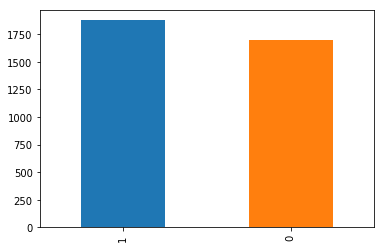

In [69]:
df_labels["relabeled_returns"].value_counts().plot(kind="bar")

In [70]:
rate_pos_returns = df_labels["relabeled_returns"].value_counts()[1] / df_labels.shape[0] * 100
rate_neg_returns = df_labels["relabeled_returns"].value_counts()[0] / df_labels.shape[0] * 100

print("Anteil positiver Returns: {}% - Anteil negativer Returns: {}%".format(round(rate_pos_returns, 2), round(rate_neg_returns, 2)))

Anteil positiver Returns: 52.48% - Anteil negativer Returns: 47.52%


In [71]:
#df_labels_single = df_labels.groupby("Timestamp").agg("last")

In [72]:
#df_labels_single.head()

In [73]:
#Y = df_labels["Next_Day_Return"].values.reshape(nr_days, 10)#df_labels_single.values
Y = df_labels["relabeled_returns"].values.reshape(nr_days, no_companies)
Y.shape

(325, 11)

In [245]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, RobustScaler
scaler      = MinMaxScaler(feature_range=(0, 1))
std_scaler  = StandardScaler()
nrm_scaler  = Normalizer()
rob_scaler  = RobustScaler()
rescaled    = scaler.fit_transform(X)

In [225]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LeakyReLU, PReLU

from keras import backend as K

from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras import optimizers
from keras.losses import binary_crossentropy
#from keras.optimizers import SGD

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

In [263]:
X_train, X_val, y_train, y_val = train_test_split(rescaled, Y, test_size=0.3, random_state=212134)
#X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [264]:
dims = X.shape[1]
print(dims, 'dims')
print("Building model...")

nb_classes = Y.shape[1]
print(nb_classes, 'classes')

121 dims
Building model...
11 classes


In [209]:
print(X_train.shape)
print(y_train.shape)

(227, 121)
(227, 11)


### Andi

In [ ]:
model = Sequential()

# Add layers
model.add(Dense(Y.shape[1], input_shape=(dims,), kernel_initializer='uniform', activation="relu"))
model.add(Dense(Y.shape[1]**2, kernel_initializer='uniform', activation="relu"))
model.add(Dense(Y.shape[1]**2, kernel_initializer='uniform', activation="relu"))
model.add(Dense(Y.shape[1], kernel_initializer='uniform', activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="SGD",
              metrics=['accuracy']) # Accuracy performance metric

hist = model.fit(X_train, y_train,
                 epochs=100,
                 batch_size=30,
                 verbose=2,
                 validation_data=(X_val, y_val))

### PREDICTION ###
y_pred = model.predict(X_val)
y_head = np.round(y_pred, 0)

### EVALUATE Classification - MODEL ###

score = model.evaluate(X_val, y_val,verbose=1)


In [77]:
score

[-1.3606109619140625, 0.13333334028720856]

In [48]:
y_train[0]

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

### Nils

In [276]:
def custom_tanh(x):
    return (K.tanh((2/3)*x) * 1.5)#1.7159) #(2/3)

def custom_tanh_output(x):
    return (K.sigmoid( (0.75) * x )) +0.001# (2/3) + 0.02

In [98]:
from keras.initializers import RandomNormal

In [99]:
RandomNormal(mean=0.0, stddev=0.05, seed=123345)

In [265]:
def make_model(optimizer="sgd", dropout=True, 
               dropout_param=0.37, first_last_hl_size=30, mid_hl_size=50, input_activation="softmax", no_layers=5):
    
    model = Sequential()
    #Input Layer
    model.add(Dense(nb_classes, input_shape=(dims,), activation=custom_tanh))#, use_bias=True
                   #kernel_initializer="random_uniform")) #input_activation
    
    #Hidden Layers
    model.add(Dense(100, #kernel_initializer="random_normal", #RandomNormal(mean=0.0, stddev=1/np.sqrt(dims*first_last_hl_size), seed=123345)
                    activation="relu"))#, use_bias=True)) "relu" , use_bias=True
    #model.add(LeakyReLU(alpha=.001))
    #model.add(PReLU())
    if dropout:
        model.add(Dropout(dropout_param))
    i = 0
    while i < no_layers:
        model.add(Dense(mid_hl_size, activation="relu"))#, use_bias=True))
        #model.add(PReLU())
        #model.add(LeakyReLU(alpha=.001))
        if dropout:
            model.add(Dropout(dropout_param))
        i = i+1
            
    model.add(Dense(first_last_hl_size, activation="relu"))#, use_bias=True))

    #Output Layer
    model.add(Dense(nb_classes, activation=custom_tanh_output)) 
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['binary_accuracy'])
    return model

In [25]:
my_classifier = KerasClassifier(make_model,  verbose=2) #batch_size=10, epochs=100,

batch_size = [10,12,14,30]#np.arange(55,105,10)
epochs = [50]#np.arange(80,120,5)
optimizer = ["sgd", "RMSprop"]#["sgd", "adam", "nadam"]
#dropout = [True, False]
#dropout_param = np.linspace(0.29, 0.38, 10)
input_activation=["softsign", "tanh", "softplus", "softmax"]
no_layers = np.arange(1,6)
first_last_hl_size = np.arange(20,50,10)
mid_hl_size = np.arange(30,150, 20)


param_grid = dict(epochs=epochs, optimizer=optimizer, input_activation=input_activation)

validator = GridSearchCV(my_classifier,
                         param_grid=param_grid)
                         #scoring=["accuracy"])
                         #n_jobs=2)
validator.fit(X_train, y_train)


Epoch 1/50
 - 1s - loss: 0.6940 - acc: 0.4909
Epoch 2/50
 - 0s - loss: 0.6919 - acc: 0.5309
Epoch 3/50
 - 0s - loss: 0.6941 - acc: 0.5006
Epoch 4/50
 - 0s - loss: 0.6922 - acc: 0.5285
Epoch 5/50
 - 0s - loss: 0.6920 - acc: 0.5273
Epoch 6/50
 - 0s - loss: 0.6933 - acc: 0.5236
Epoch 7/50
 - 0s - loss: 0.6920 - acc: 0.5285
Epoch 8/50
 - 0s - loss: 0.6932 - acc: 0.5261
Epoch 9/50
 - 0s - loss: 0.6919 - acc: 0.5236
Epoch 10/50
 - 0s - loss: 0.6934 - acc: 0.5103
Epoch 11/50
 - 0s - loss: 0.6926 - acc: 0.5067
Epoch 12/50
 - 0s - loss: 0.6920 - acc: 0.5297
Epoch 13/50
 - 0s - loss: 0.6920 - acc: 0.5333
Epoch 14/50
 - 0s - loss: 0.6915 - acc: 0.5370
Epoch 15/50
 - 0s - loss: 0.6919 - acc: 0.5321
Epoch 16/50
 - 0s - loss: 0.6931 - acc: 0.5055
Epoch 17/50
 - 0s - loss: 0.6907 - acc: 0.5455
Epoch 18/50
 - 0s - loss: 0.6918 - acc: 0.5139
Epoch 19/50
 - 0s - loss: 0.6925 - acc: 0.5127
Epoch 20/50
 - 0s - loss: 0.6919 - acc: 0.5333
Epoch 21/50
 - 0s - loss: 0.6922 - acc: 0.5273
Epoch 22/50
 - 0s - lo

GridSearchCV(cv=None, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001B3530FD908>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'epochs': [50], 'optimizer': ['sgd', 'RMSprop'], 'input_activation': ['softsign', 'tanh', 'softplus', 'softmax']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
validator.estimator.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=50, verbose=2)

Train on 113 samples, validate on 29 samples
Epoch 1/50
 - 26s - loss: 0.7030 - acc: 0.4755 - val_loss: 0.7037 - val_acc: 0.4890
Epoch 2/50
 - 0s - loss: 0.7059 - acc: 0.4747 - val_loss: 0.7034 - val_acc: 0.4922
Epoch 3/50
 - 0s - loss: 0.7001 - acc: 0.4972 - val_loss: 0.7032 - val_acc: 0.4953
Epoch 4/50
 - 0s - loss: 0.7034 - acc: 0.4867 - val_loss: 0.7029 - val_acc: 0.4953
Epoch 5/50
 - 0s - loss: 0.6974 - acc: 0.4932 - val_loss: 0.7027 - val_acc: 0.5016
Epoch 6/50
 - 0s - loss: 0.6993 - acc: 0.4948 - val_loss: 0.7024 - val_acc: 0.5016
Epoch 7/50
 - 0s - loss: 0.7018 - acc: 0.5012 - val_loss: 0.7022 - val_acc: 0.5016
Epoch 8/50
 - 0s - loss: 0.7027 - acc: 0.4739 - val_loss: 0.7019 - val_acc: 0.4953
Epoch 9/50
 - 0s - loss: 0.7012 - acc: 0.4747 - val_loss: 0.7017 - val_acc: 0.4922
Epoch 10/50
 - 0s - loss: 0.7010 - acc: 0.4875 - val_loss: 0.7015 - val_acc: 0.4953
Epoch 11/50
 - 0s - loss: 0.6978 - acc: 0.4899 - val_loss: 0.7013 - val_acc: 0.4953
Epoch 12/50
 - 0s - loss: 0.6978 - acc:

In [26]:
print('The parameters of the best model are: ')
print(validator.best_params_)
print(validator.best_score_)

The parameters of the best model are: 
{'epochs': 50, 'input_activation': 'softmax', 'optimizer': 'sgd'}
0.5156878454495321


In [280]:
test = make_model(dropout_param=0.5, mid_hl_size=80, no_layers=8, optimizer="Adamax", #RMSProp #0.37
                  first_last_hl_size=20, input_activation="softmax").fit(X_train, y_train, validation_data = (X_val, y_val), 
                                                                         epochs=500, batch_size=20, verbose=2)

Train on 227 samples, validate on 98 samples
Epoch 1/500
 - 13s - loss: 0.6941 - binary_accuracy: 0.5010 - val_loss: 0.6930 - val_binary_accuracy: 0.5306
Epoch 2/500
 - 0s - loss: 0.6935 - binary_accuracy: 0.4986 - val_loss: 0.6930 - val_binary_accuracy: 0.4991
Epoch 3/500
 - 0s - loss: 0.6926 - binary_accuracy: 0.5178 - val_loss: 0.6931 - val_binary_accuracy: 0.5000
Epoch 4/500
 - 0s - loss: 0.6932 - binary_accuracy: 0.5070 - val_loss: 0.6931 - val_binary_accuracy: 0.4944
Epoch 5/500
 - 0s - loss: 0.6932 - binary_accuracy: 0.5118 - val_loss: 0.6931 - val_binary_accuracy: 0.4879
Epoch 6/500
 - 0s - loss: 0.6921 - binary_accuracy: 0.5250 - val_loss: 0.6932 - val_binary_accuracy: 0.4879
Epoch 7/500
 - 0s - loss: 0.6937 - binary_accuracy: 0.5026 - val_loss: 0.6933 - val_binary_accuracy: 0.4879
Epoch 8/500
 - 0s - loss: 0.6931 - binary_accuracy: 0.4998 - val_loss: 0.6933 - val_binary_accuracy: 0.4879
Epoch 9/500
 - 0s - loss: 0.6927 - binary_accuracy: 0.5062 - val_loss: 0.6933 - val_binary

In [269]:
import matplotlib.pyplot as plt

In [277]:
np.mean(test.history['val_binary_accuracy'][-100:])

0.5111039113876771

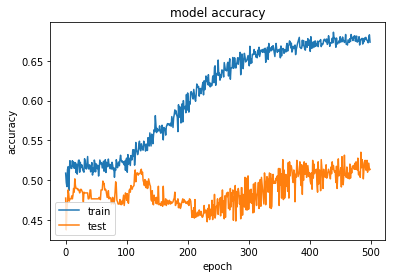

In [278]:
plt.plot(test.history['binary_accuracy'])
plt.plot(test.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()

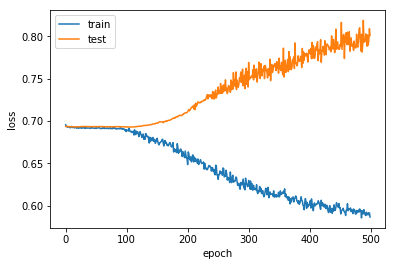

In [279]:
plt.plot(test.history['loss'])
plt.plot(test.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [79]:
model = Sequential()

#Optimizer
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.6, nesterov=True)

#Input Layer
model.add(Dense(nb_classes, input_shape=(dims,), activation="softmax"))#LeakyReLU(alpha=0.3)

#Hidden Layers
model.add(Dense(300, activation=LeakyReLU(alpha=0.3), use_bias=True))
model.add(Dropout(0.4))
model.add(Dense(500, activation="relu", use_bias=True))
model.add(Dropout(0.5))
model.add(Dense(300, activation="relu", use_bias=True))
#model.add(Activation('softplus'))

#Output Layer
model.add(Dense(nb_classes, activation="sigmoid"))


model.compile(optimizer="sgd", loss='binary_crossentropy', metrics=["accuracy"])

model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=30, 
          batch_size=128, verbose=True)

score = model.evaluate(X_val, y_val,verbose=1)

C:\Users\Nils\Anaconda3\lib\site-packages\keras\activations.py:103: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


Train on 79 samples, validate on 20 samples
Epoch 1/30
79/79 [==============================] - 1s 13ms/step - loss: 0.6909 - acc: 0.2278 - val_loss: 0.6894 - val_acc: 0.2000
Epoch 2/30
79/79 [==============================] - 0s 202us/step - loss: 0.6894 - acc: 0.2186 - val_loss: 0.6891 - val_acc: 0.2000
Epoch 3/30
79/79 [==============================] - 0s 380us/step - loss: 0.6903 - acc: 0.2221 - val_loss: 0.6887 - val_acc: 0.1864
Epoch 4/30
79/79 [==============================] - 0s 329us/step - loss: 0.6891 - acc: 0.2083 - val_loss: 0.6884 - val_acc: 0.1727
Epoch 5/30
79/79 [==============================] - 0s 380us/step - loss: 0.6889 - acc: 0.2048 - val_loss: 0.6880 - val_acc: 0.1591
Epoch 6/30
79/79 [==============================] - 0s 380us/step - loss: 0.6885 - acc: 0.1933 - val_loss: 0.6877 - val_acc: 0.1455
Epoch 7/30
79/79 [==============================] - 0s 392us/step - loss: 0.6899 - acc: 0.1772 - val_loss: 0.6873 - val_acc: 0.1409
Epoch 8/30
79/79 [===============

In [58]:
E = model.predict(X[0].reshape(1,90))
E

array([[0.0000000e+00, 1.0000000e+00, 1.2261952e-27, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 6.2738419e-01, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)